<a href="https://colab.research.google.com/github/yvonnecshih/Setosa/blob/main/reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [5]:
c = np.array([[-1.782],
       [-0.736],
       [ 2.119],
       [-2.284],
       [-1.953],
       [ 0.238],
       [-1.983],
       [ 1.815],
       [ 0.274],
       [-1.041]])
print("c = ", c)
print("c.ndim = ", c.ndim)
print("c.shape = ", c.shape) #shape=(10, 1)

c =  [[-1.782]
 [-0.736]
 [ 2.119]
 [-2.284]
 [-1.953]
 [ 0.238]
 [-1.983]
 [ 1.815]
 [ 0.274]
 [-1.041]]
c.ndim =  2
c.shape =  (10, 1)


In [ ]:
#test array
c = np.array([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
print("c = ", c)
print("c.ndim = ", c.ndim)
print("c.shape = ", c.shape) #shape=(3, 2, 3)

c =  [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]]
c.ndim =  3
c.shape =  (3, 2, 3)


In [ ]:
b = np.array([[   4. ,   90. ,   75. , 2125. ,   14.5,   74. ,    0. ,    0. ,
           1. ]])
print("b=", b)
print("b.ndim = ", b.ndim)
print("b.shape = ", b.shape) #shape=(2, 4, 3, 4) 

b= [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]
b.ndim =  2
b.shape =  (1, 9)


In [ ]:
b = np.array([   4. ,   90. ,   75. , 2125. ,   14.5,   74. ,    0. ,    0. ,
           1. ])
print("b=", b)
print("b.ndim = ", b.ndim)
print("b.shape = ", b.shape) #shape=(2, 4, 3, 4) 

b= [   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]
b.ndim =  1
b.shape =  (9,)


In [ ]:
c = np.array([[[[1, 1, 2, 3],[1, 1, 2, 3], [1, 1, 2, 3]], 
            [[1, 1, 2, 3],[1, 1, 2, 3], [1, 1, 2, 3]],
            [[1, 1, 2, 3],[1, 1, 2, 3], [1, 1, 2, 3]],
            [[1, 1, 2, 3],[1, 1, 2, 3], [1, 1, 2, 3]]],
            [[[1, 1, 2, 3],[1, 1, 2, 3], [1, 1, 2, 3]], 
            [[1, 1, 2, 3],[1, 1, 2, 3], [1, 1, 2, 3]],
            [[1, 1, 2, 3],[1, 1, 2, 3], [1, 1, 2, 3]],
            [[1, 1, 2, 3],[1, 1, 2, 3], [1, 1, 2, 3]]]])
print("c = ", c)
print("c.ndim = ", c.ndim)
print("c.shape = ", c.shape) #shape=(2, 4, 3, 4) 

c =  [[[[1 1 2 3]
   [1 1 2 3]
   [1 1 2 3]]

  [[1 1 2 3]
   [1 1 2 3]
   [1 1 2 3]]

  [[1 1 2 3]
   [1 1 2 3]
   [1 1 2 3]]

  [[1 1 2 3]
   [1 1 2 3]
   [1 1 2 3]]]


 [[[1 1 2 3]
   [1 1 2 3]
   [1 1 2 3]]

  [[1 1 2 3]
   [1 1 2 3]
   [1 1 2 3]]

  [[1 1 2 3]
   [1 1 2 3]
   [1 1 2 3]]

  [[1 1 2 3]
   [1 1 2 3]
   [1 1 2 3]]]]
c.ndim =  4
c.shape =  (2, 4, 3, 4)


In [ ]:
x = tf.ones((3, 3))
print('x = ', x)

x =  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [ ]:
x = tf.ones((1, 4))
print('x = ', x)

x =  tf.Tensor([[1. 1. 1. 1.]], shape=(1, 4), dtype=float32)


In [7]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [6]:
a = np.array(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'])
print(a.ndim)
print(a.shape)

1
(8,)


In [8]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
dataset = raw_dataset.copy()
dataset


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [9]:
print(raw_dataset.ndim)
print(raw_dataset.shape)

2
(398, 8)


In [10]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
dataset = dataset.dropna()

In [13]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [14]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [16]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
test_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
9,15.0,8,390.0,190.0,3850.0,8.5,70,0,0,1
25,10.0,8,360.0,215.0,4615.0,14.0,70,0,0,1
28,9.0,8,304.0,193.0,4732.0,18.5,70,0,0,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,0,1,0
33,19.0,6,232.0,100.0,2634.0,13.0,71,0,0,1
...,...,...,...,...,...,...,...,...,...,...
369,34.0,4,112.0,88.0,2395.0,18.0,82,0,0,1
375,36.0,4,105.0,74.0,1980.0,15.3,82,1,0,0
382,34.0,4,108.0,70.0,2245.0,16.9,82,0,1,0
384,32.0,4,91.0,67.0,1965.0,15.7,82,0,1,0


In [ ]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0,1,0


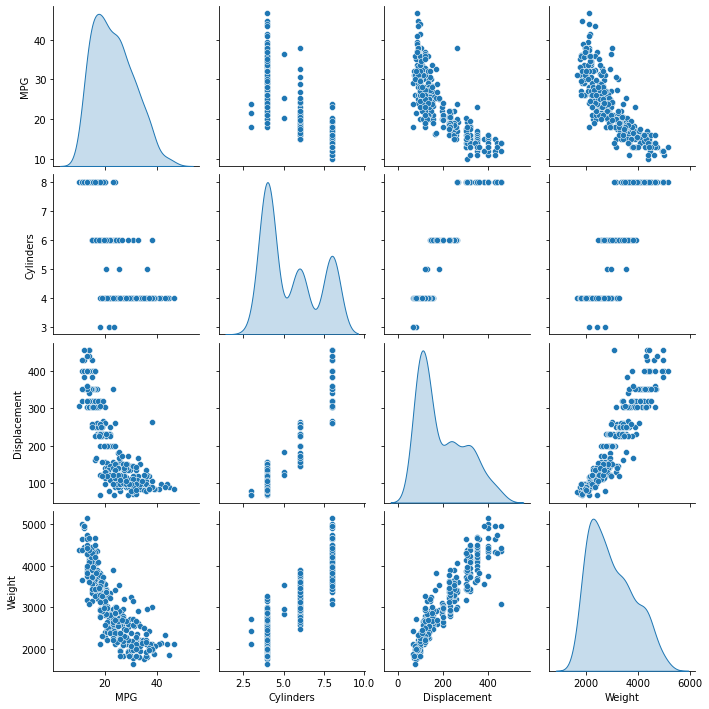

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [ ]:
train_dataset.describe() 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [ ]:
train_labels

65     14.0
132    25.0
74     13.0
78     21.0
37     18.0
       ... 
207    20.0
279    29.5
227    19.0
148    26.0
143    26.0
Name: MPG, Length: 318, dtype: float64

In [ ]:
train_features  

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [ ]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,4,83.0,61.0,2003.0,19.0,74,0,1,0


In [ ]:
first = np.array(train_features[:1])
first

array([[   4. ,   90. ,   75. , 2125. ,   14.5,   74. ,    0. ,    0. ,
           1. ]])

In [ ]:
print("train_features = ", train_features.shape) 

train_features =  (314, 9)


In [ ]:
print("first.shape = ", first.shape) 

first.shape =  (1, 9)


In [ ]:
print("first.ndim = ", first.ndim)

first.ndim =  2


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [ ]:
a = (4- 5.478)/1.699
a

-0.8699234844025896

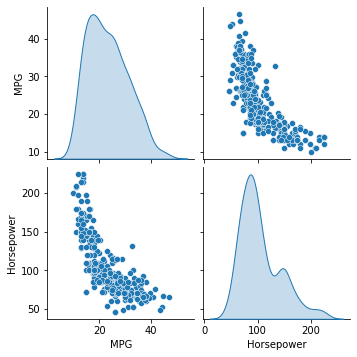

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Horsepower']], diag_kind='kde')